In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn import metrics
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('SDG_goal3_clean.csv')
#Slice dataframe for predictive model
X = df[['Universal health coverage (UHC) service coverage index', 'Health worker density, by type of occupation (per 10,000 population)::PHYSICIAN']].values
y = df['Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
neighbour_for_test = neighbors.KNeighborsRegressor(n_neighbors = 4).fit(X_train, y_train)

In [3]:
#Create sample data for sample prediction
sample = [92, 34.295]
sample_prediction = neighbour_for_test.predict([sample])
print('-----Sample test case-----')
print('Universal health coverage: ', sample[0])
print('Physician density: ', sample[1])
print('Predicted mortality rate: ', int(sample_prediction))
print('--------------------------')

-----Sample test case-----
Universal health coverage:  92
Physician density:  34.295
Predicted mortality rate:  9
--------------------------


In [4]:
#Actual predictions
y_prediction = neighbour_for_test.predict(X_test)
mean_square_error = metrics.mean_squared_error(y_test, y_prediction)
print("RMSE: ", sqrt(mean_square_error))
#An r-squared score of 1 means it's perfect
print("R-squared score: ", metrics.r2_score(y_test, y_prediction))

RMSE:  5.371290122098933
R-squared score:  0.5264804759418702


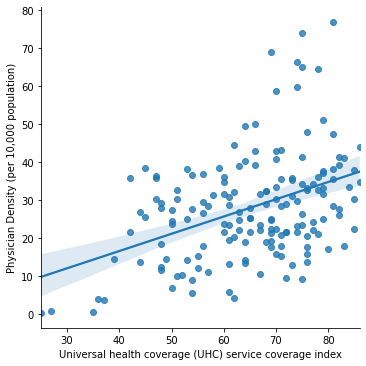

In [5]:
universal_health_coverage = "Universal health coverage (UHC) service coverage index"
physician_density = "Health worker density, by type of occupation (per 10,000 population)::PHYSICIAN"

ax = sns.lmplot(x = universal_health_coverage, y = physician_density, data = df)
ax.set(xlabel = "Universal health coverage (UHC) service coverage index", ylabel = "Physician Density (per 10,000 population)")
plt.show()

Given the intense scattering of the points in the scatterplot, it is safe to assume that the r-squared score of around 0.53 makes sense, as there are some points close to the regression line, but not that many. An r-squared score of one/near one indicates a more compact scatterplot where all the points are near the regression line. Example is provided below.

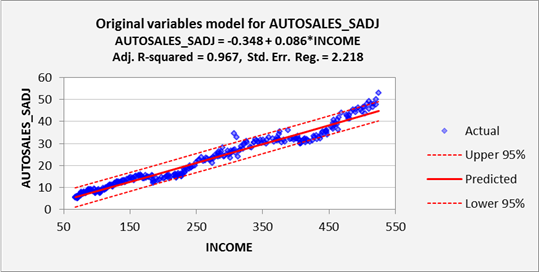

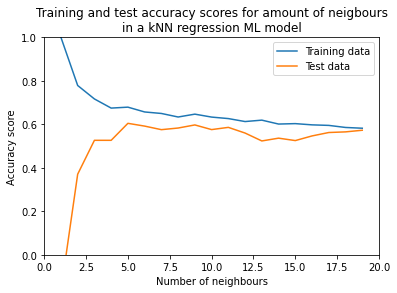

In [6]:
train_accuracy_scores = []
test_accuracy_scores = []
values = [i for i in range(1, 20)]

for i in values:
    accuracy_model = neighbors.KNeighborsRegressor(n_neighbors = i)
    accuracy_model.fit(X_train, y_train)
    
    train_accuracy = accuracy_model.score(X_train, y_train)
    train_accuracy_scores.append(train_accuracy)
    
    test_accuracy = accuracy_model.score(X_test, y_test)
    test_accuracy_scores.append(test_accuracy)

plt.title("Training and test accuracy scores for amount of neigbours\nin a kNN regression ML model")
plt.plot(values, train_accuracy_scores, label = "Training data")
plt.plot(values, test_accuracy_scores, label = "Test data")
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy score")
plt.xlim(xmin = 0, xmax = 20)
plt.ylim(ymin = 0, ymax = 1)

plt.legend()
plt.show()